# Laboratorium 1

## Treść zadania
Przygotuj następujące zbiory punktów (2D, współrzędne rzeczywiste typu double):  
a. 10^5 losowych punktów o współrzędnych z przedziału [-1000, 1000],  
b. 10^5 losowych punktów o współrzędnych z przedziału [-10 14 , 1014 ],  
c. 1000 losowych punktów leżących na okręgu o środku (0,0) i promieniu R=100,  
d. 1000 losowych punktów o współrzędnych z przedziału [-1000, 1000] leżących na prostej wyznaczonej przez wektor (a,b) przyjmij a = [-1.0, 0.0], b = [1.0, 0.1]

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import random, math
%matplotlib inline

## Rozwiązanie
*a. 10^5 losowych punktów o współrzędnych z przedziału [-1000, 1000]*

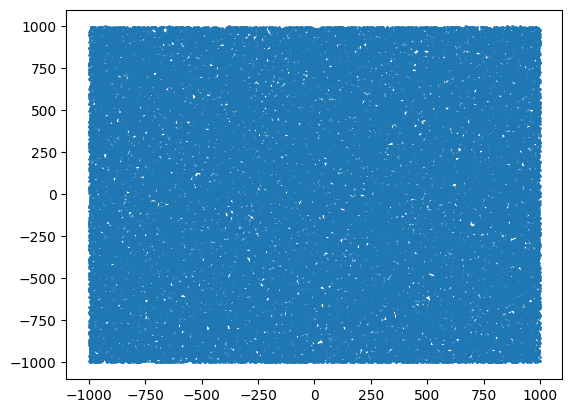

In [8]:
points_a = [(random.uniform(-1000, 1000), random.uniform(-1000, 1000)) for _ in range(10**5)]

plt.scatter(*zip(*points_a), s=1)
plt.show()

*b. 10^5 losowych punktów o współrzędnych z przedziału [-10 14 , 1014 ]*

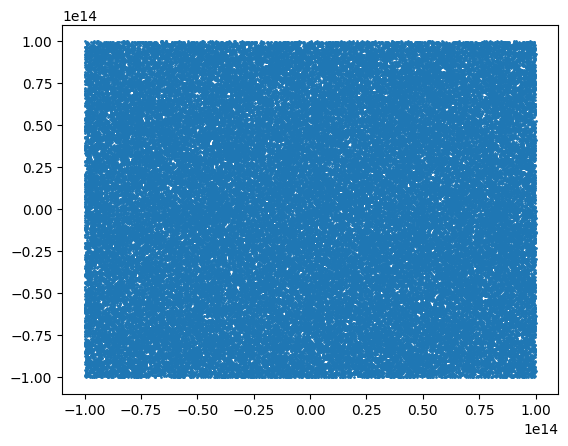

In [10]:
points_b = [(random.uniform(-10**14, 10**14), random.uniform(-10**14, 10**14)) for _ in range(10**5)]

plt.scatter(*zip(*points_b), s=1)
plt.show()

*c. 1000 losowych punktów leżących na okręgu o środku (0,0) i promieniu R=100*

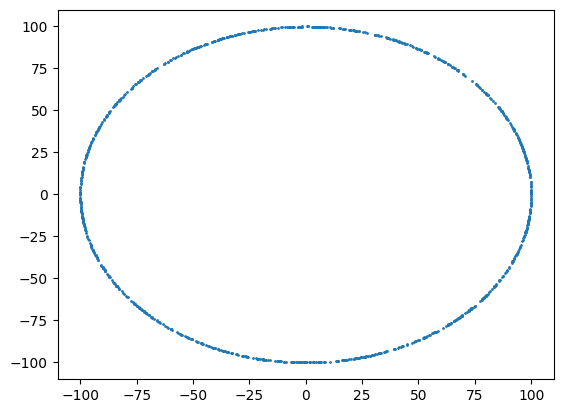

In [19]:
def rand_on_circle(origin, radius):
    org_x, org_y = origin
    t = random.uniform(0, 2*math.pi)
    return (org_x + radius * math.cos(t), org_y + radius * math.sin(t))

points_c = [rand_on_circle((0, 0), 100) for _ in range(1000)]

plt.scatter(*zip(*points_c), s=1)
plt.show()

*d. 1000 losowych punktów o współrzędnych z przedziału [-1000, 1000] leżących na prostej wyznaczonej przez wektor*

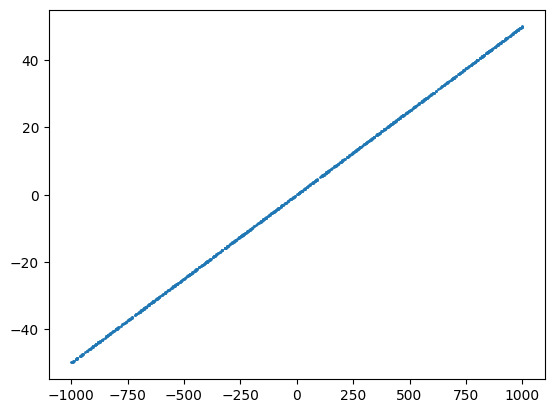

In [18]:
points_d = []
for i in range(1000):
    x = np.random.uniform(-1000, 1000)
    y = 0.05 * x + 0.05
    new_point = (x, y)
    points_d.append(new_point)

plt.scatter(*zip(*points_d), s=1)
plt.show()

### Funckcje wyznaznika

In [20]:
def det_1(a,b, c):
    a_x, a_y = a
    b_x, b_y = b
    c_x, c_y = c
    return (a_x * b_y) + (a_y * c_x) + (b_x * c_y) - (b_y * c_x) + (c_y * a_x) + (a_y * b_x)

In [21]:
def det_2(a,b,c):
    a_x, a_y = a
    b_x, b_y = b
    c_x, c_y = c
    return (a_x - c_x) * (b_y - c_y) - (a_y - c_y) * (b_x - c_x)

In [ ]:
def det_3(a,b,c):
    a_x, a_y = a
    b_x, b_y = b
    c_x, c_y = c
    return np.linalg.det(np.array([[a_x, a_y, 1], [b_x, b_y, 1], [c_x, c_y, 1]]))

In [22]:
def det_4(a,b,c):
    a_x, a_y = a
    b_x, b_y = b
    c_x, c_y = c
    matrix = np.array([[a_x - c_x, a_y - c_y],
                      [b_x - c_x, b_y - c_y]])
    return np.linalg.det(matrix)